In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd pipeline

/work/tmb/ocr-tutorial/pipeline


In [3]:
figsize(16,10)
rc("image", cmap="gray", interpolation="bicubic")
from dlinputs import gopen

In [4]:
!rm -f bin.tgz rot.tgz skew.tgz lines.tgz

# Input Pages

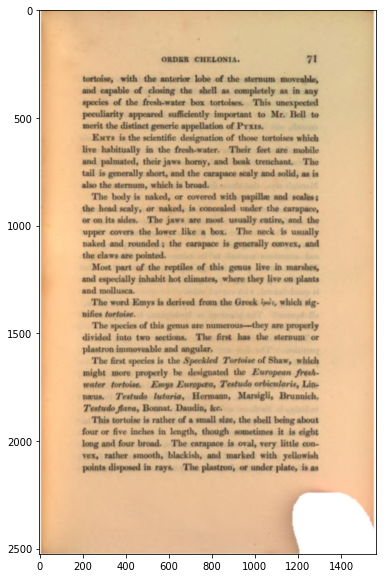

In [5]:
sample = gopen.sharditerator("pages.tgz").next()
imshow(sample["jpeg"])

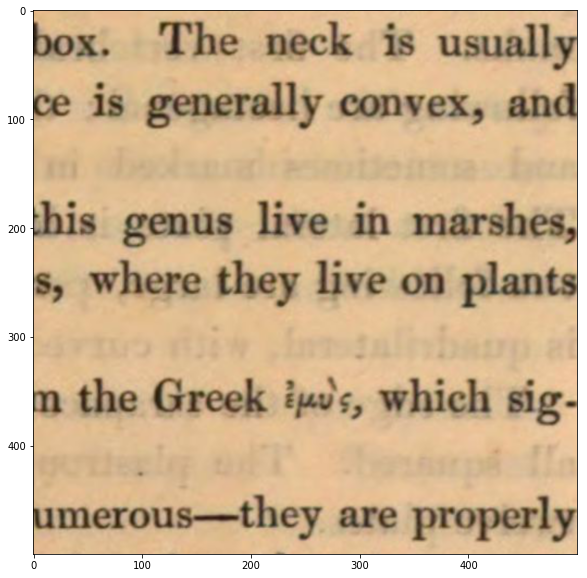

In [6]:
imshow(sample["jpeg"][1000:1500, 800:1300])

# Binarization

In [7]:
!ocrobin-pred pages.tgz bin.tgz

loading /usr/local/share/ocrobin/bin-000000046-005393.pt
Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): LSTM2(
    (hlstm): RowwiseLSTM(
      (lstm): LSTM(8, 4, bidirectional=1)
    )
    (vlstm): RowwiseLSTM(
      (lstm): LSTM(8, 4, bidirectional=1)
    )
  )
  (4): Conv2d(8, 1, kernel_size=(1, 1), stride=(1, 1))
  (5): Sigmoid()
)
0 ['Image_0080']
1 ['Image_0081']
2 ['Image_0082']
3 ['Image_0083']
4 ['Image_0084']
5 ['Image_0085']


['__source__', 'bin.png', '__key__']


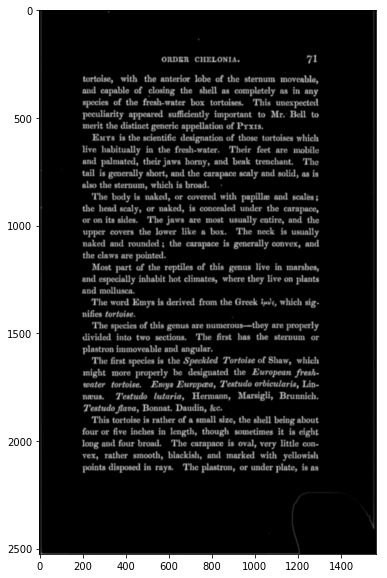

In [8]:
binsample = gopen.sharditerator("bin.tgz").next()
print binsample.keys()
imshow(binsample["bin.png"])

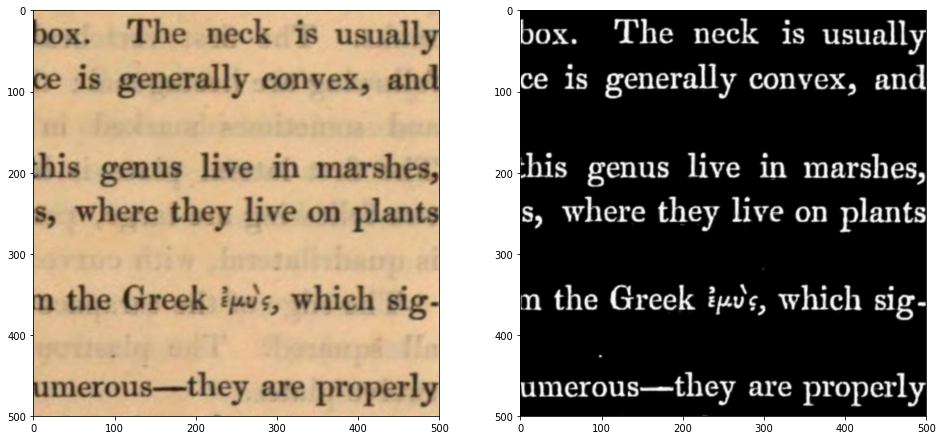

In [9]:
subplot(121); imshow(sample["jpeg"][1000:1500, 800:1300])
subplot(122); imshow(binsample["bin.png"][1000:1500, 800:1300])

# Rotation and Skew Correction

In [10]:
!ocrorot-pred bin.tgz rot.tgz

loading /usr/local/share/ocrorot/rot-000003456-020897.pt
Sequential(
  (0): CheckSizes [(1, 128), (1, 512), (256, 256), (256, 256)]
  (1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
  (7): ReLU()
  (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (9): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (11): ReLU()
  (12): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (13): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (15): ReLU()
  (16): Img2Flat

In [11]:
!ocroskew-pred rot.tgz skew.tgz

loading /usr/local/share/ocrorot/logskew-000015808-000132.pt
Sequential(
  (0): CheckSizes [(1, 128), (1, 512), (256, 256), (256, 256)]
  (1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
  (3): ReLU()
  (4): Spectrum
  (5): Conv2d(8, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (6): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True)
  (7): ReLU()
  (8): Reshape((0, [1, 2, 3]))
  (9): Linear(in_features=262144, out_features=128, bias=True)
  (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=30, bias=True)
  (13): Sigmoid()
  (14): CheckSizes [(1, 128), (30, 30)]
)
0 Image_0080 0.0
1 Image_0081 -0.2
2 Image_0082 0.0
3 Image_0083 0.0
4 Image_0084 0.0
5 Image_0085 -0.2


# Page Segmentation

In [12]:
!ocroseg-predlines skew.tgz lines.tgz

loading /usr/local/share/ocroseg/lowskew-000000259-011440.pt
Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (10): ReLU()
  (11): LSTM2(
    (hlstm): RowwiseLSTM(
      (lstm): LSTM(64, 32, bidirectional=1)
    )
    (vlstm): RowwiseLSTM(
      (lstm): LSTM(64, 32, bidirectional=1)
    )
  )
  (12): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (14): ReLU()
  (15

In [13]:
!tar -ztvf lines.tgz | sed 10q

-rw-rw-rw- bigdata/bigdata  32 2018-04-24 06:42 Image_0080/000000.json
-rw-rw-rw- bigdata/bigdata 3567 2018-04-24 06:42 Image_0080/000000.line.png
-rw-rw-rw- bigdata/bigdata   33 2018-04-24 06:42 Image_0080/000001.json
-rw-rw-rw- bigdata/bigdata 10040 2018-04-24 06:42 Image_0080/000001.line.png
-rw-rw-rw- bigdata/bigdata    33 2018-04-24 06:42 Image_0080/000002.json
-rw-rw-rw- bigdata/bigdata 10383 2018-04-24 06:42 Image_0080/000002.line.png
-rw-rw-rw- bigdata/bigdata    33 2018-04-24 06:42 Image_0080/000003.json
-rw-rw-rw- bigdata/bigdata 10242 2018-04-24 06:42 Image_0080/000003.line.png
-rw-rw-rw- bigdata/bigdata    33 2018-04-24 06:42 Image_0080/000004.json
-rw-rw-rw- bigdata/bigdata 10793 2018-04-24 06:42 Image_0080/000004.line.png
tar: write error


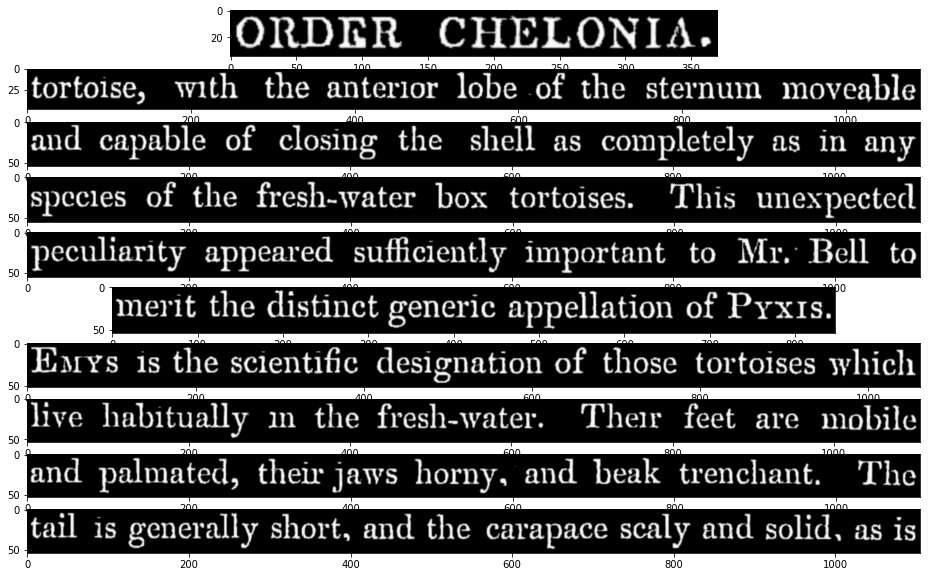

In [14]:
for i, l in enumerate(gopen.sharditerator_once("lines.tgz")):
    if i==10: break
    subplot(10, 1, i+1); imshow(l["line.png"])

# Text Line Recognition

In [15]:
!ocroline-pred -b 20 lines.tgz | sed 30q

loading /usr/local/share/ocroline/line2-000003330-004377.pt
Sequential(
  (0): Reorder BHWD->BDHW
  (1): CheckSizes [(0, 900), (1, 1), (48, 48), (0, 9000)]
  (2): Conv2d(1, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), dilation=(1, 1), ceil_mode=False)
  (6): Conv2d(100, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True)
  (8): ReLU()
  (9): Reshape((0, [1, 2], 3))
  (10): CheckSizes [(0, 900), (0, 5000), (0, 9000)]
  (11): LSTM1:LSTM(4800, 200, bidirectional=1)
  (12): Conv1d(400, 97, kernel_size=(1,), stride=(1,))
  (13): Reorder BDW->BWD
  (14): CheckSizes [(0, 900), (0, 9000), (97, 97)]
)
ORDER CHELONIA.
tortoise, ith the anterior lobe of the stternum moveable
and capable of closing the shell as completely as in any
spccies of the fresh-water box tortoises. This unexpected
peculia